# Electric Vehicle Range Prediction Project

## 1. Introduction
This notebook explores the Washington State Electric Vehicle Population dataset to predict the electric range of vehicles based on their features.
We will perform Exploratory Data Analysis (EDA), preprocess the data, and train a machine learning model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
sns.set(style='whitegrid')

## 2. Data Loading

In [ ]:
try:
    df = pd.read_csv('../data/ev_population.csv')
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Dataset not found. Please check the path.")

Dataset loaded successfully.


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


## 3. Exploratory Data Analysis (EDA)

In [ ]:
# Dataset Info
print(df.info())

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270262 entries, 0 to 270261
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         270262 non-null  object 
 1   County                                             270252 non-null  object 
 2   City                                               270252 non-null  object 
 3   State                                              270262 non-null  object 
 4   Postal Code                                        270252 non-null  float64
 5   Model Year                                         270262 non-null  int64  
 6   Make                                               270262 non-null  object 
 7   Model                                              270262 non-null  object 
 8   Electric Vehicle Type                              270262 non-null  object

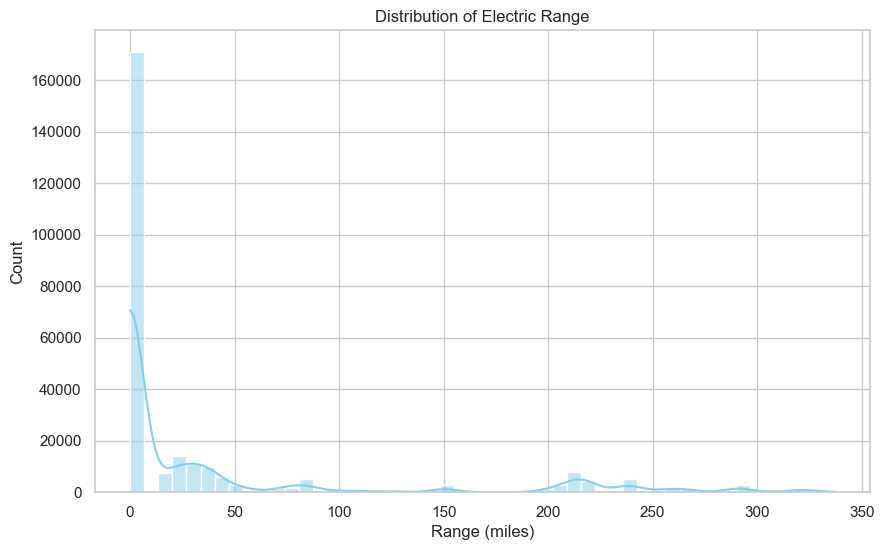

In [ ]:
# Distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Range (miles)')
plt.show()

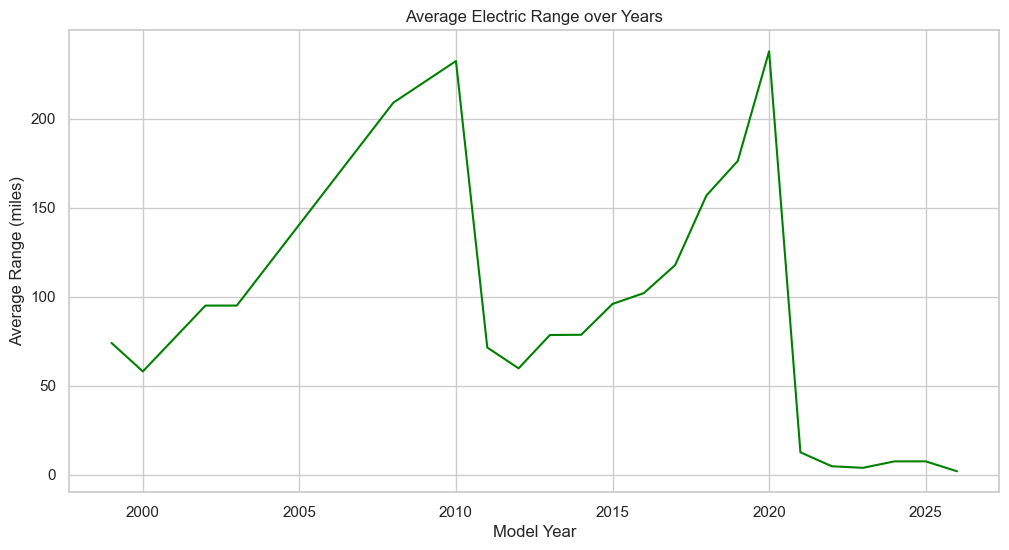

In [ ]:
# Electric Range vs Model Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=df, estimator='mean', errorbar=None, color='green')
plt.title('Average Electric Range over Years')
plt.ylabel('Average Range (miles)')
plt.show()

C:\Users\subam\AppData\Local\Temp\ipykernel_19740\935136987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Make', data=df_top, order=top_makes, palette='magma')


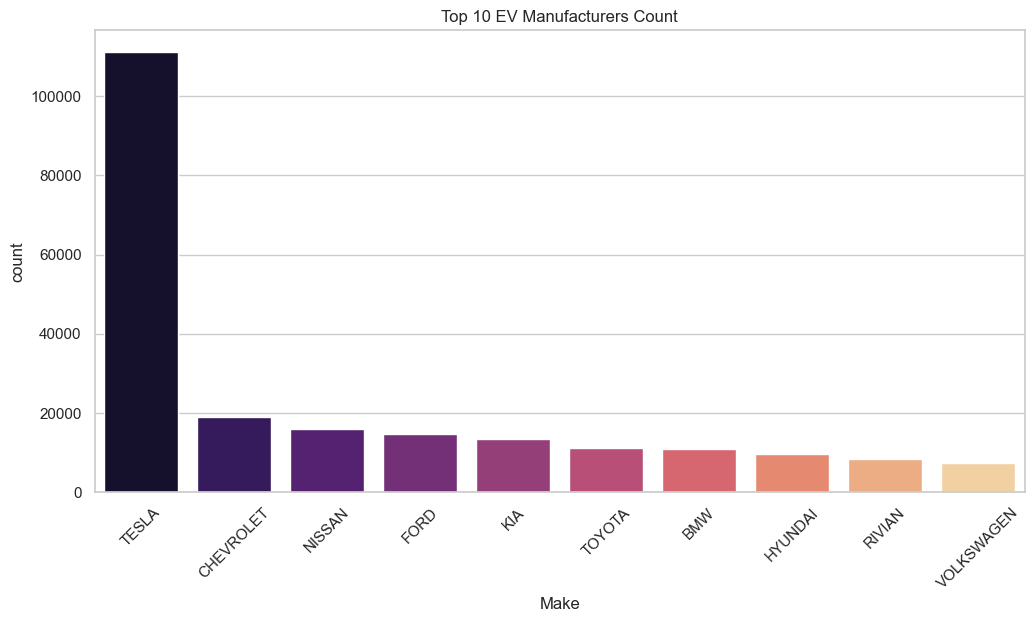

In [ ]:
# Top 10 Manufacturers
top_makes = df['Make'].value_counts().nlargest(10).index
df_top = df[df['Make'].isin(top_makes)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Make', data=df_top, order=top_makes, palette='magma')
plt.title('Top 10 EV Manufacturers Count')
plt.xticks(rotation=45)
plt.show()

## 4. Feature Selection & Preprocessing

In [ ]:
# Filter out 0 range - likely missing data or Hybrid in EV mode unknown
# For this prediction task, we want rows with valid Range
df_clean = df[df['Electric Range'] > 0].copy()
print(f"Data shape after removing 0 range: {df_clean.shape}")

# Selecting relevant features for prediction
features_to_use = ['Make', 'Model', 'Model Year', 'Electric Vehicle Type', 'Legislative District']
target = 'Electric Range'

# Handle Missing values if any in selected features
df_clean = df_clean.dropna(subset=features_to_use)

# Label Encoding
le = LabelEncoder()
for col in features_to_use:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

X = df_clean[features_to_use]
y = df_clean[target]

Data shape after removing 0 range: (100385, 16)


## 5. Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


## 6. Model Evaluation

RMSE: 5.80
R2 Score: 0.9964


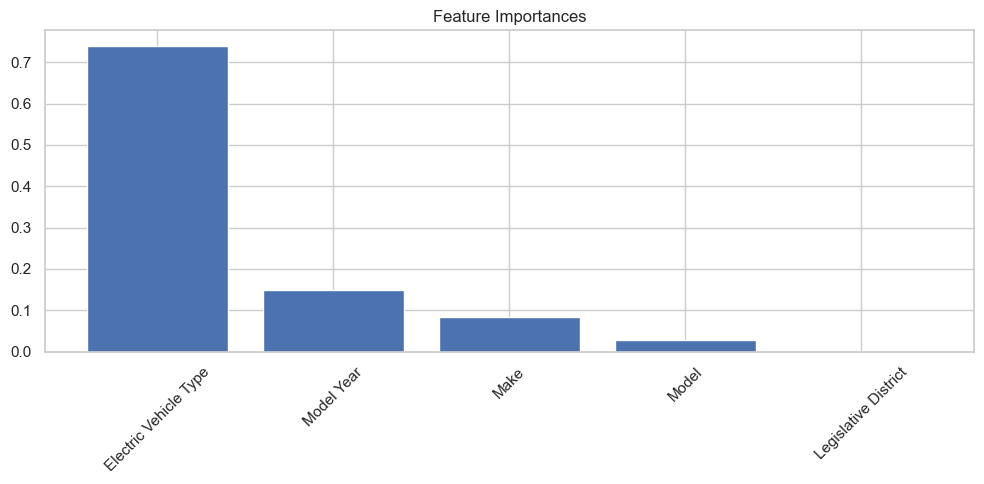

In [ ]:
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features_to_use[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()